# PGA project
- Is it possible to predict 'making the cut' or not at a PGA event?

- Making the cut is important for players and sponsors alike. 
    - A typical PGA event is 4 rounds of golf. Thursday - Sunday
    - 'The top 70 players (including ties) make the cut. Any player in 71st place or worse (after Friday's round) is cut.' - pga.com

- From a players perspective, making the cut is important for many reasons. 
    - If a player misses the weekend, they do not get paid.
    - Also, prized FEDEX cup points are missed. ('The FedEx Cup is the central professional golf competition that compares player performance across part of the PGA Tour season in a League and Playoffs structure.')
    - For continued poor performance, their tour eligibilty could be in jeopardy. 

- From a sponsors perspective, making the cut equates to 'eyes on product'.
    - Players making the weekend are televised more. Sunday draws the largest viewership of the tournament days. 
        - 2-4 million viewers for non-majors
        - 5 million for majors
        - 10 million for 'The Masters'

# Project Goal
- This data science project will attempt to predict whether or not a player will make the cut, based on previous weeks performance, coupled with season averages(drive distance, fairway percentage, putting average). 

# Imports

In [1]:
# Standard imports
import pandas as pd
import itertools
import numpy as np
import scipy.stats as stats
from scipy.stats import levene

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# .py imports

import explore as e
import prepare as prep
import pretty as muah
import knear as k

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data Dictionary
- Listing of features(variables) used

| Variable               | Description                           |
|------------------------|---------------------------------------|
| date                   | Date of the event                       |
| course                 | Name of the golf course                 |
| tournament name        | Name of the tournament                   |
| made_cut               | Indicator of whether the player made the cut or not |
| sg_putt_prev           | Strokes gained/lost putting in previous events |
| sg_arg_prev            | Strokes gained/lost around-the-green in previous events |
| sg_app_prev            | Strokes gained/lost approach in previous events |
| sg_ott_prev            | Strokes gained/lost off-the-tee in previous events |
| sg_t2g_prev            | Strokes gained/lost tee-to-green in previous events |
| sg_total_prev          | Total strokes gained/lost in previous events |
| driving_avg            | Distance of the player's drives in yards |
| fairways_hit           | Percentage of fairways hit by the player |
| putting_avg            | Average number of putts per hole        |


# Acquire/Prepare (Run function: get_prepped_pga() )

#### Acquire
- Read CSV from downloaded source
- There are 14041 rows of data
    - Each observation is a player and their performance stats on a given tournament
    - Current week performance, previous week performance are included in each observation
    - Weather data is also included for the tournament
    - Season long stats (Driving avg, putting avg, and fairway hit percentage) are also included

#### Prepare
- Run function that:
    - check for nulls
    - drop nulls (for consistency in data, all nulls were dropped)
    - make all columns lower case for ease of use
    - drop columns unnecessary to this study (anything not relating to previous performance is dropped)
    - rename columns for readability/understanding
- Run summary function that:
    - Performs univariate analysis
        - View and understand descriptive statistics within the dataset through this comprehensive dataframe summary

In [2]:
# Acquire prepped data
df = prep.get_prepped_pga()
df.head()


,date,course,tournament_name,made_cut,sg_putt_prev,sg_arg_prev,sg_app_prev,sg_ott_prev,sg_t2g_prev,sg_total_prev,driving_avg,fairways_hit,putting_avg
player,,,,,,,,,,,,,
Robert Allenby,2018-05-20,"Trinity Forest - Dallas, TX",AT&T Byron Nelson,1.0,0.17,-0.93,0.65,-0.30,-0.57,-0.40,286.9,65.6,1.84
Robert Allenby,2018-10-06,"TPC Southwind, Memphis, TN",FedEx St. Jude Classic,0.0,1.06,-1.32,-1.07,-0.73,-3.12,-2.07,286.9,65.6,1.84
Robert Allenby,2018-07-15,"TPC Deere Run - Silvis, IL",John Deere Classic,0.0,-1.07,-0.48,0.71,-0.01,0.22,-0.85,286.9,65.6,1.84
Robert Allenby,2018-07-23,"Keene Trace - Nicholasville, KY",Barbasol Championship,0.0,-1.78,-0.18,-0.77,-0.52,-1.47,-3.25,286.9,65.6,1.84
Robert Allenby,2019-07-21,"Keene Trace - Nicholasville, KY",Barbasol Championship,0.0,-2.32,-0.31,-1.75,-0.35,-2.40,-4.73,293.8,60.7,1.77


# Univariate analysis (Run function: summarize(df))
- Check out distributions of variables in the dataset
- Analyize descriptive statistics

SUMMARY REPORT
          
          
Dataframe head: 
                     date                           course  \
player                                                       
Robert Allenby 2018-05-20      Trinity Forest - Dallas, TX   
Robert Allenby 2018-10-06       TPC Southwind, Memphis, TN   
Robert Allenby 2018-07-15       TPC Deere Run - Silvis, IL   
Robert Allenby 2018-07-23  Keene Trace - Nicholasville, KY   
Robert Allenby 2019-07-21  Keene Trace - Nicholasville, KY   

                       tournament_name  made_cut  sg_putt_prev  sg_arg_prev  \
player                                                                        
Robert Allenby       AT&T Byron Nelson       1.0          0.17        -0.93   
Robert Allenby  FedEx St. Jude Classic       0.0          1.06        -1.32   
Robert Allenby      John Deere Classic       0.0         -1.07        -0.48   
Robert Allenby   Barbasol Championship       0.0         -1.78        -0.18   
Robert Allenby   Barbasol Championshi

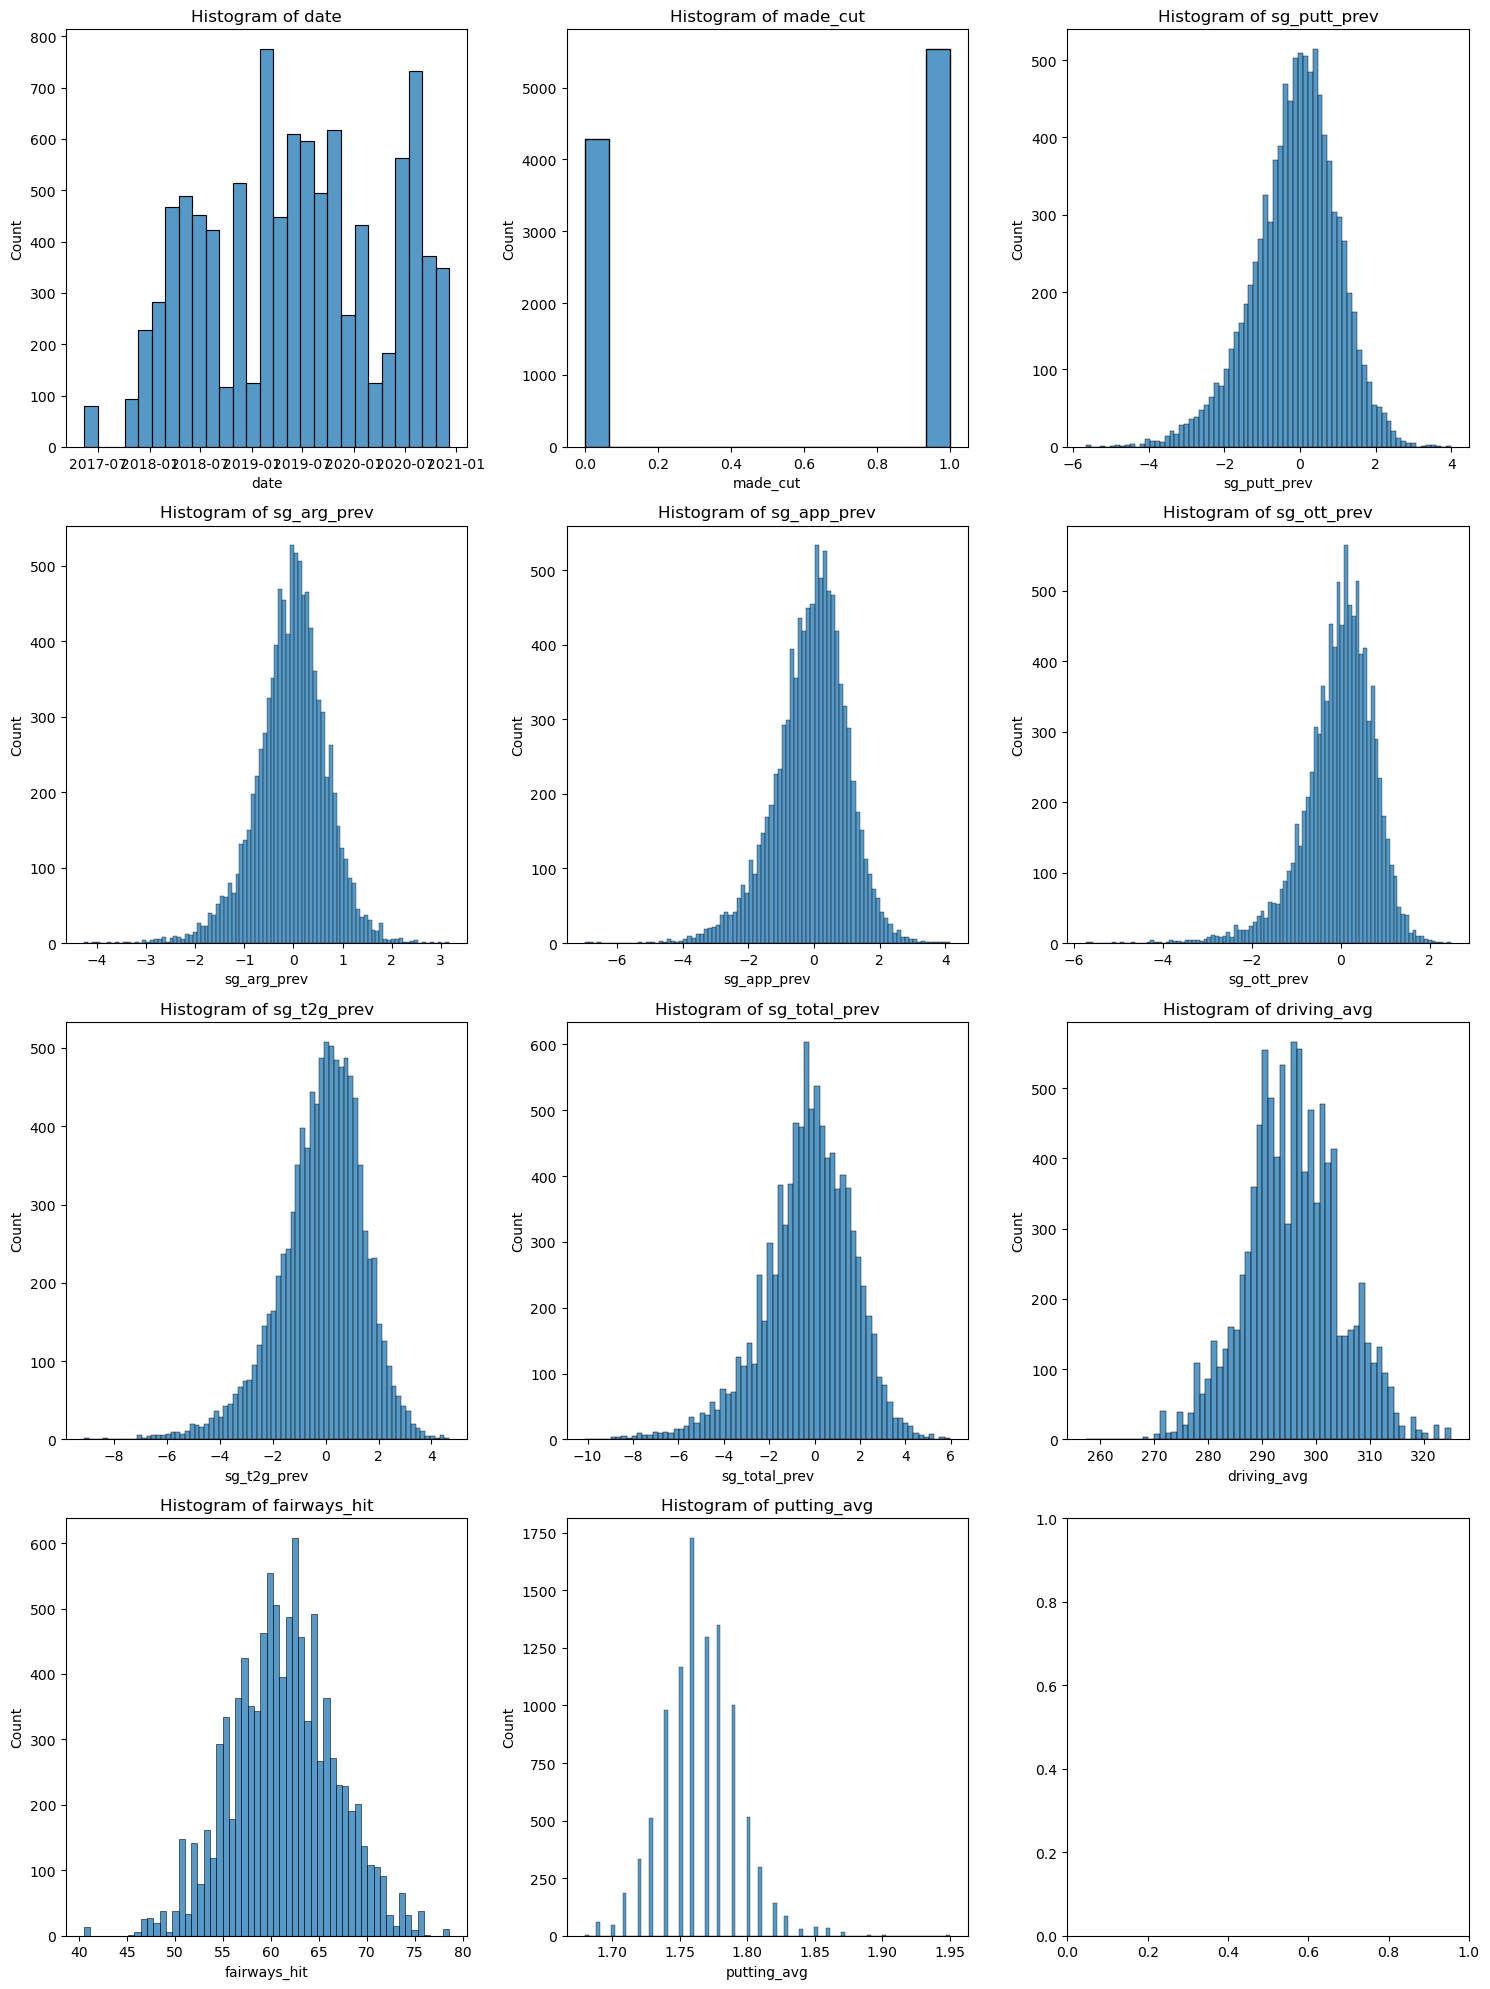

In [3]:
# Run summary function
prep.summarize(df)

# Train, Test, Split
- In preparation for exploration
    - Split data into train, validate, and test
    - 60/20/20 respectively

In [4]:
# Split data
train, validate, test = prep.split_data(df, 'made_cut')
train.head()

,date,course,tournament_name,made_cut,sg_putt_prev,sg_arg_prev,sg_app_prev,sg_ott_prev,sg_t2g_prev,sg_total_prev,driving_avg,fairways_hit,putting_avg
0,2018-08-26,"Ridgewood - Paramus, NJ",The Northern Trust,0.0,-1.80,-0.61,-0.92,-0.56,-2.10,-3.90,292.7,60.9,1.80
1,2020-06-28,"TPC River Highlands - Cromwell, CT",Travelers Championship,0.0,0.48,0.17,0.67,0.24,1.09,1.57,301.7,56.5,1.78
2,2018-02-25,"PGA National - Palm Beach Gardens, FL",The Honda Classic,0.0,1.97,0.35,-0.29,-3.36,-3.30,-1.33,289.3,52.0,1.81
3,2018-04-02,"TPC Scottsdale - Scottsdale, AZ",Waste Management Phoenix Open,0.0,-0.10,-0.79,2.58,0.53,2.32,2.22,296.2,55.2,1.79
4,2019-03-17,"TPC Sawgrass - Ponte Vedra Beach, FL",The Players Championship,1.0,1.37,0.30,0.26,0.40,0.96,2.32,300.5,60.7,1.78


# Explore
- Set and explore target(made_cut)

- Ask and explore questions:
    - In the draft exploration phase, 9 questions were asked
        - Do strokes gained putting in the previous week affect whether or not someone will make the cut this week?
        - Do strokes gained around green in the previous week affect whether or not someone will make the cut this week?
        - Do strokes gained approach in the previous week affect whether or not someone will make the cut this week?
        - Do strokes gained off-the-tee in the previous week affect whether or not someone will make the cut this week?
        - Do strokes gained tee-to-green in the previous week affect whether or not someone will make the cut this week?
        - Do strokes gained total in the previous week affect whether or not someone will make the cut this week?
        - Does driving average affect whether or not someone will make the cut?
        - Does fairways hit percentage affect whether or not someone will make the cut?
        - Does putting average affect whether or not someone will make the cut?

- For the purposes of this final report, I will show the work done on 4 of the questions
    - The selected 4 questions had the biggest impact on strokes gained

- Alpha was set at 0.05 for all statistics tests
    - Assumptions were verified
        - Variance was explored and correctly labeled within the ttest
        - Normalcy was assumed via Central Limit Theorm
        - Observations were independent and > 30 observations are used

# Set Target
- my target is whether or not someone makes the cut. Which is a categorical variable (I will use classification models to predict this outcome).

In [5]:
# Check out target descriptive statistics
train.made_cut.describe()

count    5891.000000
mean        0.563402
std         0.496006
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: made_cut, dtype: float64

- baseline accuracy is 56.34%

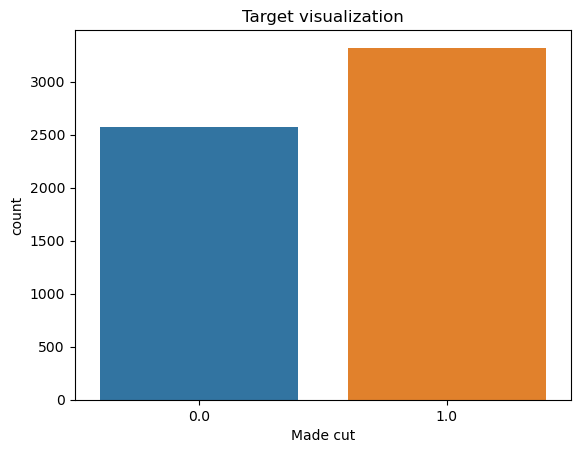

In [6]:
# Visualize cuts made within the data set
e.target_viz(train)

- The above graph is consistent with the descriptive statistics, showing that 56% of the observations make the cut. 

### Bivariate analysis
- Show case the following explorations
    - Strokes gained approach
    - Strokes gained off-the-tee
    - Strokes gained tee-to-green
    - Strokes gained total

# Do strokes gained approach in the previous week affect whether or not someone will make the cut this week?
- I want to explore whether or not previous performance is statistically significant in relation to making the cut
- I am comparing a continuous variable to a categorical so I will run a two-tailed ttest

$H_{0}$ : Mean of strokes gained approach of players who made the cut <= Mean of strokes gained approach of players who did not make the cut.

$H_{a}$ : Mean of strokes gained approach of players who made the cut > Mean of strokes gained approach of players who did not make the cut.

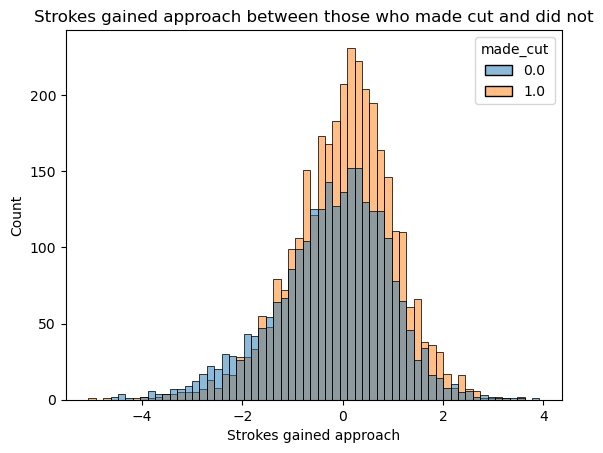

In [7]:
# Visualize strokes gained approach
e.approach_viz(train)

In [8]:
# Run statistics test
e.approach_stats(train)

Strokes gained approach average of players who made cut: 0.01
Strokes gained approach average of players who did not make the cut: -0.22
Variance is not equal (ttest_ind equal_var set to False)
We reject $H_{0}$


- Based on the p-value < alpha, we reject the null hypothesis. There is a relationship between strokes gained approach in the previous week and whether or not a player makes the cut in the following week.  I will use this feature in my model.

# Do strokes gained off-the-tee in the previous week affect whether or not someone will make the cut this week?
- I want to explore whether or not previous performance is statistically significant in relation to making the cut
- I am comparing a continuous variable to a categorical so I will run a two-tailed ttest

$H_{0}$ : Mean of strokes gained off-the-tee of players who made the cut <= Mean of strokes gained off-the-tee of players who did not make the cut.

$H_{a}$ : Mean of strokes gained off-the-tee of players who made the cut > Mean of strokes gained off-the-tee of players who did not make the cut.

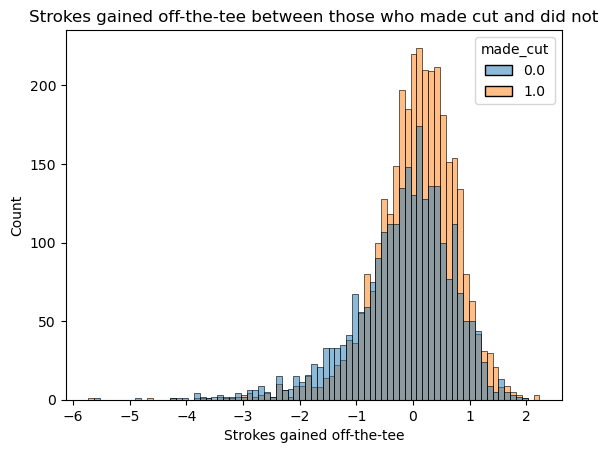

In [9]:
# Visualize strokes gained off the tee
e.off_the_tee_viz(train)

In [10]:
# Run statistics test
e.off_the_tee_stats(train)

Strokes gained off-the-tee average of players who made cut: 0.04
Strokes gained off-the-tee average of players who did not make the cut: -0.18
Variance is not equal (ttest_ind equal_var set to False)
We reject $H_{0}$


- Based on the p-value < alpha, we reject the null hypothesis. There is a relationship between strokes gained off-the-tee in the previous week and whether or not a player makes the cut in the following week.  I will use this feature in my model.

# Do strokes gained tee-to-green in the previous week affect whether or not someone will make the cut this week?
- I want to explore whether or not previous performance is statistically significant in relation to making the cut
- I am comparing a continuous variable to a categorical so I will run a two-tailed ttest

$H_{0}$ : Mean of strokes gained tee-to-green of players who made the cut <= Mean of strokes gained tee-to-green of players who did not make the cut.

$H_{a}$ : Mean of strokes gained tee-to-green of players who made the cut > Mean of strokes gained tee-to-green of players who did not make the cut.

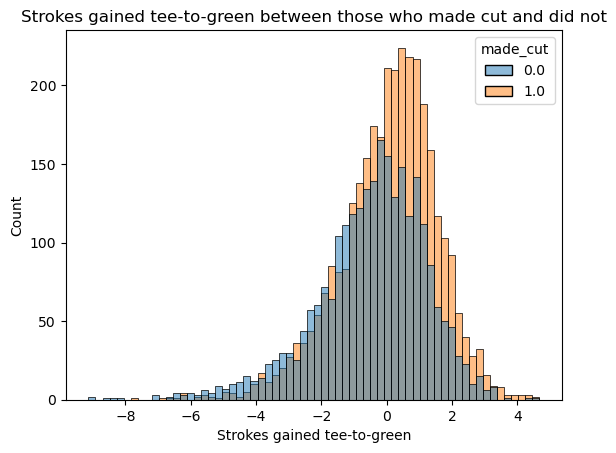

In [11]:
# Visualize strokes gained tee-to-green
e.t2g_viz(train)

In [12]:
# Run statistics test
e.t2g_stats(train)

Strokes gained tee-to-green average of players who made cut: 0.05
Strokes gained tee-to-green average of players who did not make the cut: -0.48
Variance is not equal (ttest_ind equal_var set to False)
We reject $H_{0}$


- Based on the p-value < alpha, we reject the null hypothesis. There is a relationship between strokes gained tee-to-green in the previous week and whether or not a player makes the cut in the following week.  I will use this feature in my model.

# Do strokes gained total in the previous week affect whether or not someone will make the cut this week?
- I want to explore whether or not previous performance is statistically significant in relation to making the cut
- I am comparing a continuous variable to a categorical so I will run a two-tailed ttest

$H_{0}$ : Mean of strokes gained total of players who made the cut <= Mean of strokes gained total of players who did not make the cut.

$H_{a}$ : Mean of strokes gained total of players who made the cut > Mean of strokes gained total of players who did not make the cut.

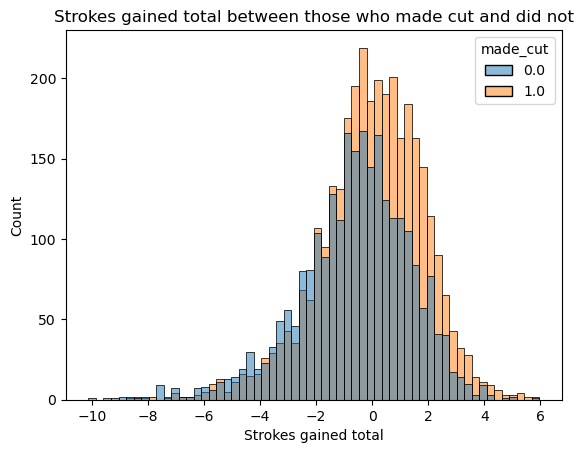

In [13]:
# Visualize strokes gained total
e.total_viz(train)

In [14]:
# Run statistics test
e.total_stats(train)

Strokes gained total of players who made cut: -0.04
Strokes gained total of players who did not make the cut: -0.64
Variance is not equal (ttest_ind equal_var set to False)
We reject $H_{0}$


- Based on the p-value < alpha, we reject the null hypothesis. There is a relationship between strokes gained total in the previous week and whether or not a player makes the cut in the following week.  I will use this feature in my model.

# Exploration Takeway

- Golf is a game of inches. Differences in strokes gained and lost throughout a tournament and the comparison between the two groups (made the cut, did not make the cut) paint a picture of razor thin margins when describing success (making the cut) on tour. 

- ***Strokes gained approach***
    - Strokes gained approach average of players who made cut: 0.015
    - Strokes gained approach average of players who did not make the cut: -0.22
- ***Strokes gained off-the-tee***
    - Strokes gained off-the-tee average of players who made cut: 0.04
    - Strokes gained off-the-tee average of players who did not make the cut: -0.17
- ***Strokes gained tee-to-green***    
    - Strokes gained tee-to-green average of players who made cut: 0.047
    - Strokes gained tee-to-green average of players who did not make the cut: -0.476
- ***Strokes gained total***
    - Strokes gained total of players who made cut: -0.041
    - Strokes gained total of players who did not make the cut: -0.64

- All features are statistically significant to the target of whether or not a player will make the cut. 
    - The features showcased in the final report seem to have the biggest impact
       
- Since all features are statistically significant and do not violate our statistical assumptions. I will run them through various classification models. 

# Modeling
- I have found significance in my independent variables, I will model those against the target using the following models to determine the best predictive model:

>- Decision tree
>- Random forest
>- KNN
>- Logistic regression

### Scale data for modeling

In [15]:
# Scale data for modeling
X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test = prep.scaled_df(train, validate, test)
X_train_scaled.head()

,sg_putt_prev,sg_arg_prev,sg_app_prev,sg_ott_prev,sg_t2g_prev,sg_total_prev,driving_avg,fairways_hit,putting_avg
0,0.415948,0.491252,0.461624,0.649497,0.509420,0.386816,0.428319,0.544000,0.423077
1,0.661638,0.596231,0.638487,0.750000,0.740580,0.726990,0.587611,0.426667,0.346154
2,0.822198,0.620458,0.531702,0.297739,0.422464,0.546642,0.368142,0.306667,0.461538
3,0.599138,0.467026,0.850945,0.786432,0.829710,0.767413,0.490265,0.392000,0.384615
4,0.757543,0.613728,0.592881,0.770101,0.731159,0.773632,0.566372,0.538667,0.346154


### Re-define baseline and visualize target variable

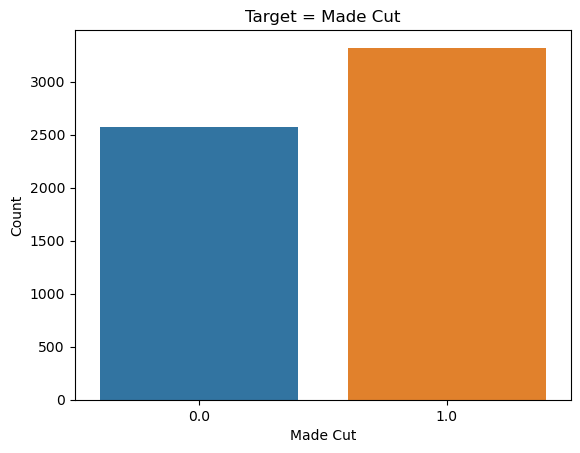

In [16]:
# Visualize target
muah.plot_target(train)

In [17]:
# Set baseline accuracy
train.made_cut.mean()

0.5634017993549483

> baseline accuracy (percentage correct with a guess) is 56%

# Decision Tree


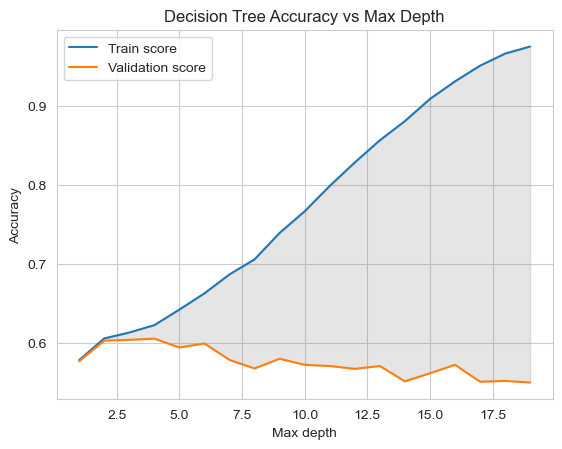

,max_depth,train_acc,val_acc,score_diff
1,2,0.60567,0.602851,0.002818


In [18]:
# Run function to iterate through hyperparameters and find best fitting model
muah.decision_tree(X_train_scaled, X_validate_scaled, y_train, y_validate)[1:2]

# Random Forest


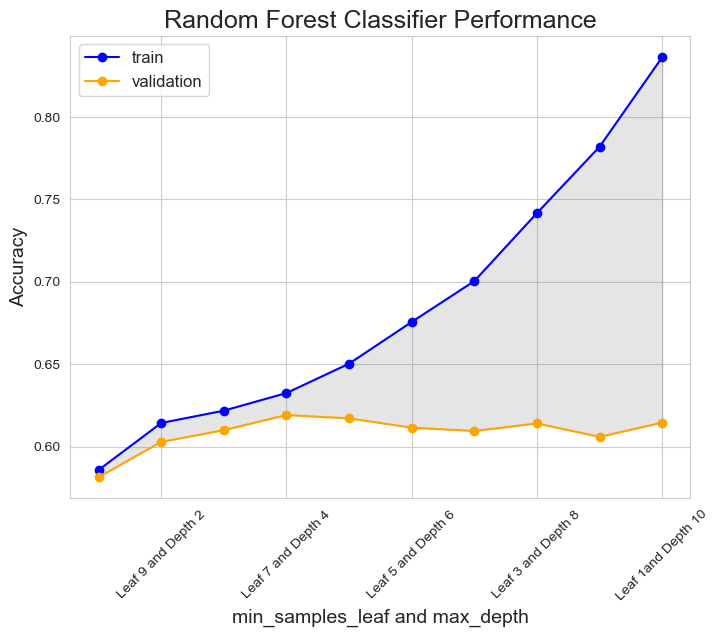

,min_samples_leaf,max_depth,train_score,validate_score,diff_score
6,7,4,0.63249,0.619145,0.013346


In [19]:
# Run function to iterate through hyperparameters and find best fitting model
muah.random_forest_scores(X_train_scaled, y_train, X_validate_scaled, y_validate)[6:7]

# KNN


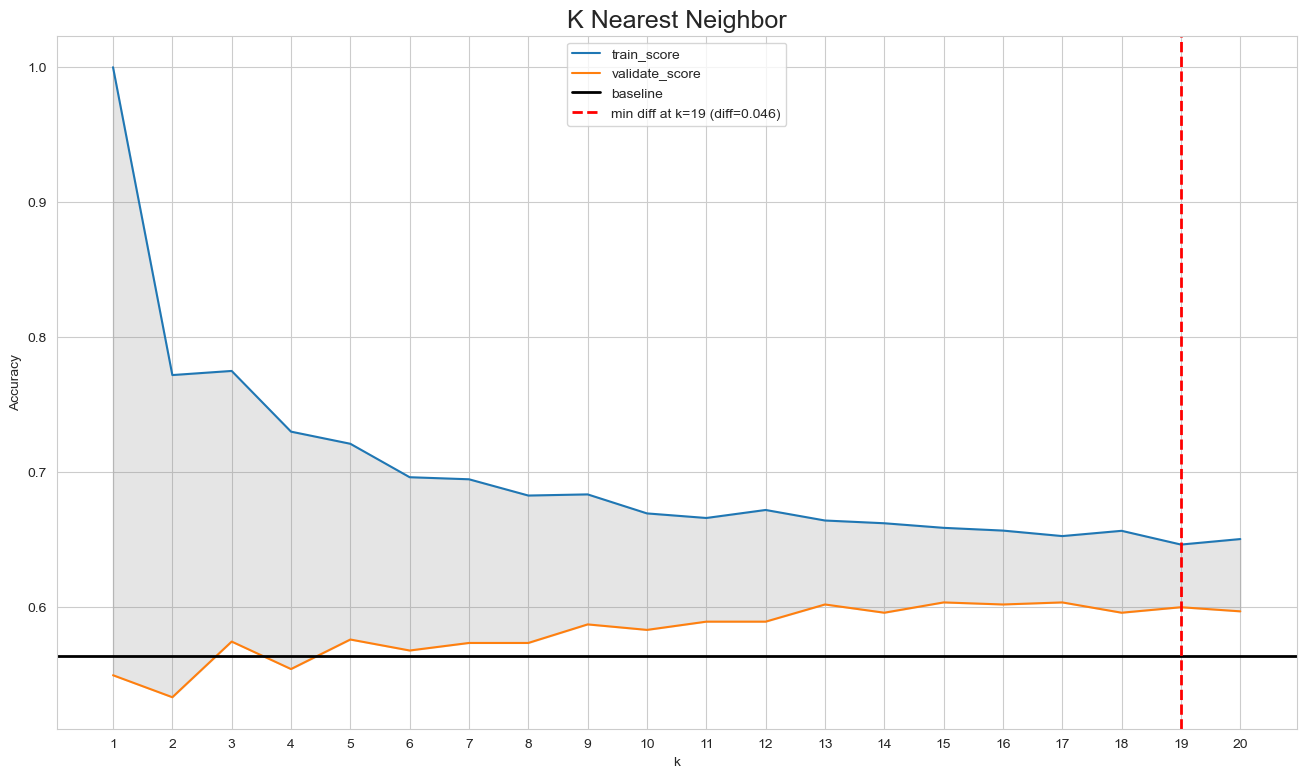

,k,train_score,validate_score,diff_score
18,19,0.64624,0.599796,0.046444


In [20]:
# Run function to iterate through hyperparameters and find best fitting model
k.k_nearest2(X_train_scaled, y_train, X_validate_scaled, y_validate)[18:19]

# Logistic Regression


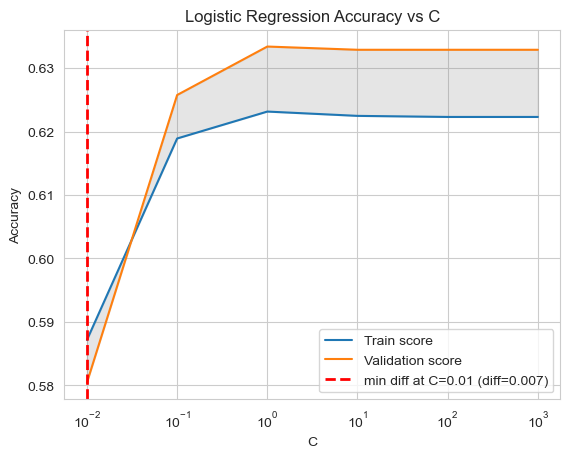

,C,train_score,validate_score,diff_score
1,0.1,0.61891,0.625764,-0.006854


In [21]:
# Run function to iterate through hyperparameters and find best fitting model
muah.plot_logistic_regression(X_train_scaled, X_validate_scaled, y_train, y_validate)[1:2]



# Compare models

| ***Decision tree*** |                   |                   |                   |                   |
|---------------------|-------------------|-------------------|-------------------|-------------------|
| Max Depth           |                   | Train Accuracy    | Validate Accuracy | Score Difference  |
| 2                   |                   | 0.60567           | 0.602851          | 0.002818          |
|---------------------|-------------------|-------------------|-------------------|-------------------|
| ***Random forest*** |                   |                   |                   |                   |
| Min Samples Leaf    | Max Depth         | Train Accuracy    | Validate Accuracy | Score Difference  |
| 7                   | 4                 | 0.63249           | 0.619145          | 0.013346          |
|---------------------|-------------------|-------------------|-------------------|-------------------|
| ***KNN***           |                   |                   |                   |                   |
| k                   |                   | Train Accuracy    | Validate Accuracy | Score Difference  |
| 17                  |                   | 0.646240          | 0.599796          | 0.046444          |
|---------------------|-------------------|-------------------|-------------------|-------------------|
| ***Logistic Regression*** |             |                   |                   |                   |
| C                   |                   | Train Accuracy    | Validate Accuracy |  Score Difference |
| 0.10                |                   | 0.618910          | 0.625764          |-0.006854          |

> - I am choosing logistic regression for my model. The hyperparameter is set at C = 0.10. Test data will be ran through the model.


# Run best model on test data


In [22]:
# Run function with test data on logistic regression
muah.the_chosen_one2(X_train_scaled, X_test_scaled, y_train, y_test)

0.6084521384928717

> - The logistic regression model performs at 61% accuracy on unseen test data. 


# Summary
- The data analysis pipeline (Acquire, Prepare, Explore, Modeling) was completed.
- All features selected were statistically significant. 
    - These features seemed to be the most important factors
        - Strokes gained approach
        - Strokes gained off-the-tee 
        - Strokes gained tee-to-green 
        - Strokes gained total
- Scaled data with selected features were ran through 4 different predictive models:
    - Decision Tree
    - Random Forest
    - KNN
    - Logistic Regression
        - Out of the four models, logistic regression performed the best. 
            - The model scored 61% on the unseen test data set. 5% better than the baseline of 56%.
            
# Recommendations
- Using this model as a guide, players and sponsors can predict next weeks performance (with 61% accuracy) based on last weeks performance. 
    - In preparation for a tournament, focus on the following to ensure best chances of making the cut:
        - Strokes gained approach
        - Strokes gained off-the-tee 
        - Strokes gained tee-to-green 
            - Tee ball accuracy and iron accuracy are premium stats. They add the most strokes to players scorecards 
    - ***Caveat*** -- There are too many unquantifiable variables to predict with 100% certainty whether or not a player will make the cut or not. 
    
# Next Steps
- To further investigate the possibility of a powerful predictive model hidden within this dataset:
    - I will continue to work on adding weather attributes, through clustering
    - Model course slope and length into the equation
    - Explore player demographics (age, height, weight).